### 📌 Report: Linear Regression Model Evaluation & Hyperparameter Tuning
 Introduction

Objective:
The goal of this study is to build a predictive model for Trip_Price_median using multiple features such as trip distance, passenger count, base fare, and time-related factors.

Approach:

  1.Data preprocessing including scaling & encoding

  2.Building a Linear Regression Model

  3.Evaluating model performance using MSE, MAE, and R²

  4.Performing Hyperparameter Tuning to improve performance

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df=pd.read_csv("/content/taxi_trip_pricing.csv")

In [58]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [59]:
df.tail()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090
999,22.85,Morning,Weekend,3.0,Medium,Clear,4.34,NaN,0.23,29.69,45.4437


In [5]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       935 non-null    float64
 1   Time_of_Day            935 non-null    object 
 2   Day_of_Week            919 non-null    object 
 3   Passenger_Count        918 non-null    float64
 4   Traffic_Conditions     920 non-null    object 
 5   Weather                919 non-null    object 
 6   Base_Fare              921 non-null    float64
 7   Per_Km_Rate            920 non-null    float64
 8   Per_Minute_Rate        927 non-null    float64
 9   Trip_Duration_Minutes  934 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [61]:
df.shape

(1000, 11)

In [62]:
df.isnull().mean()*100

,0
Trip_Distance_km,6.5
Time_of_Day,6.5
Day_of_Week,8.1
Passenger_Count,8.2
Traffic_Conditions,8.0
Weather,8.1
Base_Fare,7.9
Per_Km_Rate,8.0
Per_Minute_Rate,7.3
Trip_Duration_Minutes,6.6


In [63]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [64]:
df['Trip_Distance_km_median']=df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].median())

In [65]:
df['Time_of_Day_mode']=df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])

In [66]:
df['Day_of_Week_mode']=df["Day_of_Week"].fillna(df['Day_of_Week'].mode()[0])

In [67]:
df['Passenger_Count_median']=df["Passenger_Count"].fillna(df['Passenger_Count'].median())

In [68]:
df['Traffic_Conditions_mode']=df['Traffic_Conditions'].fillna(df['Traffic_Conditions'].mode()[0])

In [69]:
df['Weather_mode']=df['Weather'].fillna(df['Weather'].mode()[0])

In [70]:
df['Base_Fare_median']=df['Base_Fare'].fillna(df['Base_Fare'].median())

In [71]:
df['Per_Km_Rate_median']=df['Per_Km_Rate'].fillna(df['Per_Km_Rate'].median())

In [72]:
df['Per_Minute_Rate_median']=df['Per_Minute_Rate'].fillna(df['Per_Minute_Rate'].median())

In [73]:
df['Trip_Duration_Minutes_median']=df['Trip_Duration_Minutes'].fillna(df['Trip_Duration_Minutes'].median())

In [74]:
df['Trip_Price_median']=df['Trip_Price'].fillna(df['Trip_Price'].median())


In [75]:
df.isnull().sum()

,0
Trip_Distance_km,65
Time_of_Day,65
Day_of_Week,81
Passenger_Count,82
Traffic_Conditions,80
Weather,81
Base_Fare,79
Per_Km_Rate,80
Per_Minute_Rate,73
Trip_Duration_Minutes,66


In [76]:
df1=df.copy()

In [77]:
df1.drop(['Trip_Distance_km','Time_of_Day', 'Day_of_Week','Passenger_Count','Traffic_Conditions','Weather','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes','Trip_Price'],axis=1)

,Trip_Distance_km_median,Time_of_Day_mode,Day_of_Week_mode,Passenger_Count_median,Traffic_Conditions_mode,Weather_mode,Base_Fare_median,Per_Km_Rate_median,Per_Minute_Rate_median,Trip_Duration_Minutes_median,Trip_Price_median
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,3.52,0.62,0.43,40.57,50.0745
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,Clear,3.48,0.51,0.15,116.81,36.4698
4,25.92,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,0.29,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,0.29,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


Text(0.5, 1.0, 'Graph of Trip_distance_km')

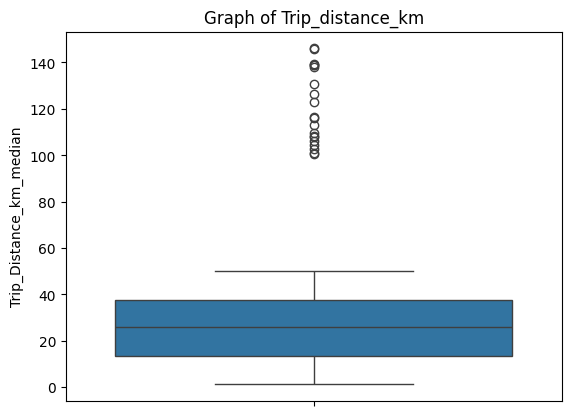

In [79]:

sns.boxplot(df['Trip_Distance_km_median'])
plt.title('Graph of Trip_distance_km')




Text(0.5, 1.0, 'Graph of Passenger_count')

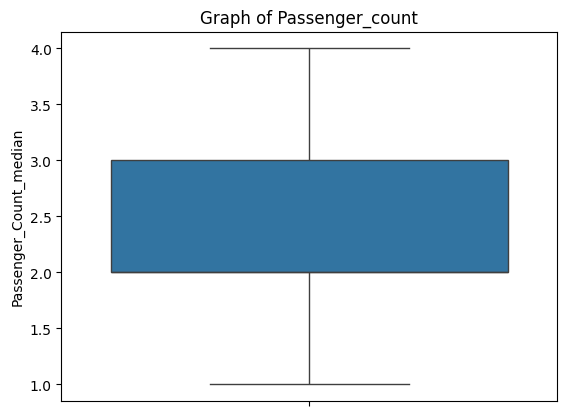

In [80]:
sns.boxplot(df['Passenger_Count_median'])
plt.title('Graph of Passenger_count')




Text(0.5, 1.0, 'graph of base fare')

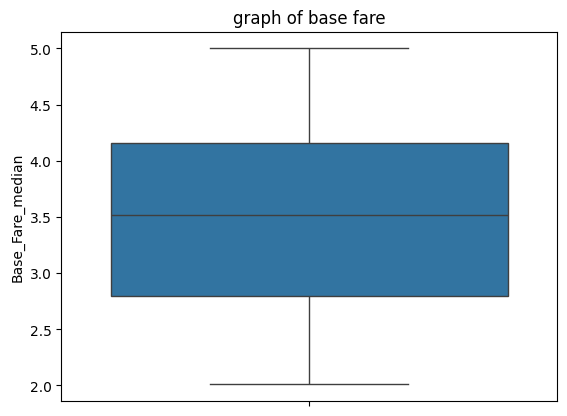

In [81]:
sns.boxplot(df['Base_Fare_median'])
plt.title('graph of base fare')



Text(0.5, 1.0, 'graph of per km rate')

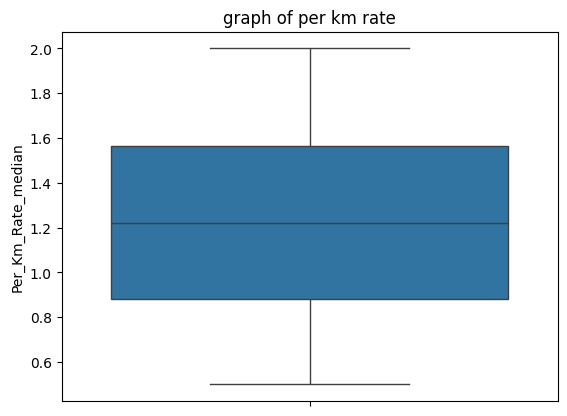

In [82]:
sns.boxplot(df['Per_Km_Rate_median'])
plt.title('graph of per km rate')



Text(0.5, 1.0, 'Graph of per min rate')

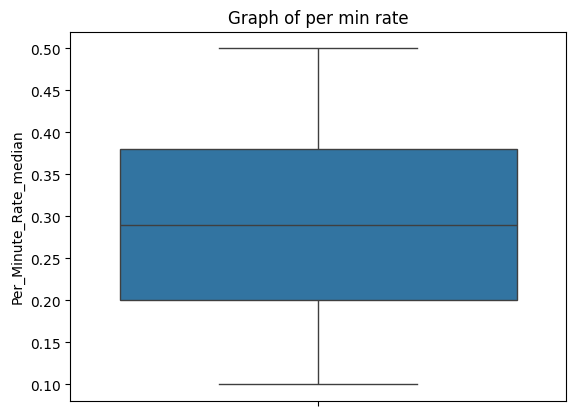

In [83]:
sns.boxplot(df['Per_Minute_Rate_median'])
plt.title('Graph of per min rate')



Text(0.5, 1.0, 'graph for trip duration min')

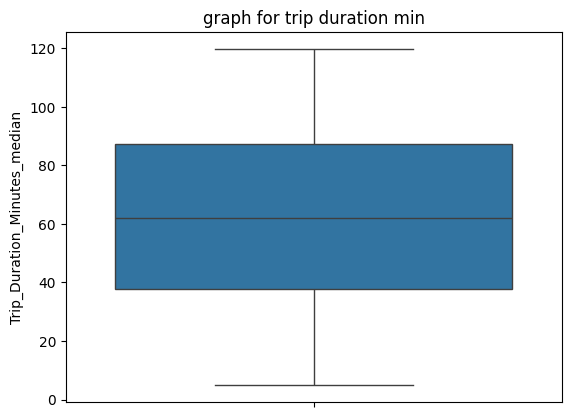

In [84]:
sns.boxplot(df['Trip_Duration_Minutes_median'])
plt.title('graph for trip duration min')



Text(0.5, 1.0, 'graph of trip price')

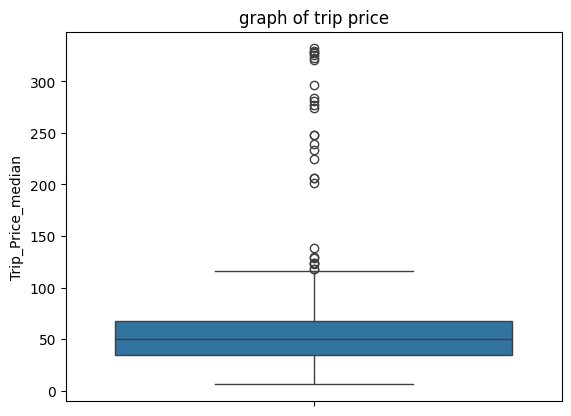

In [85]:
sns.boxplot(df['Trip_Price_median'])
plt.title('graph of trip price')

### outliers are present in column :Trip_Distance_km_median and Trip_Price_median

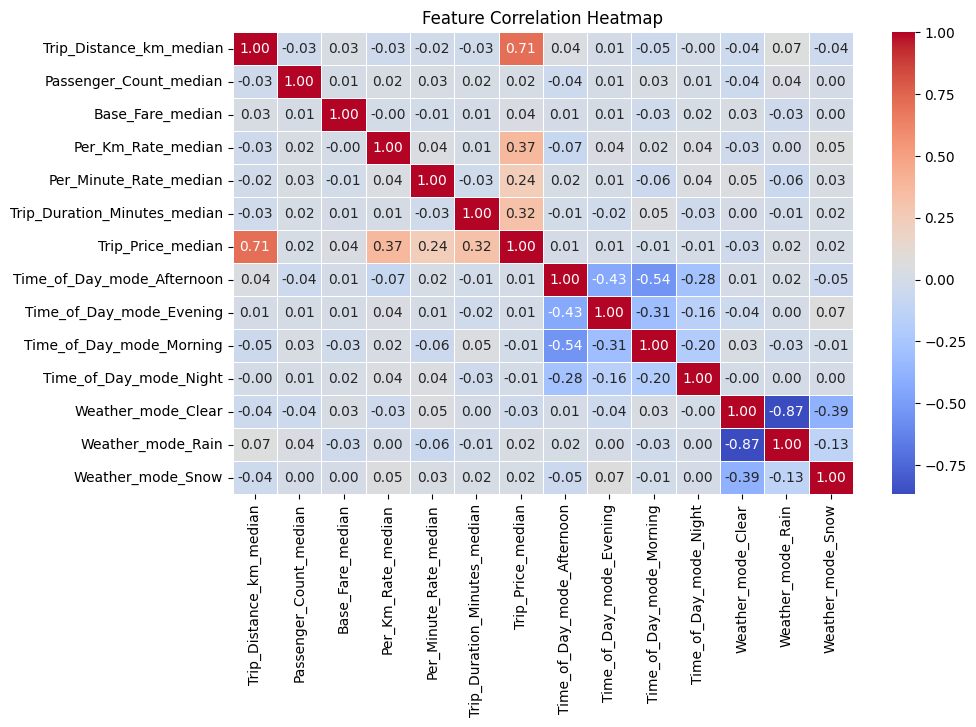

In [ ]:
import numpy as np

plt.figure(figsize=(10, 6))
# Select only numeric features for correlation analysis
numeric_df = df1.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) # Changed numeric_df1 to numeric_df
plt.title("Feature Correlation Heatmap")
plt.show()

In [86]:
# filling outliers in Trip_Distance_km_median
q1=df1.Trip_Distance_km_median.quantile(0.25)
q3=df1.Trip_Distance_km_median.quantile(0.75)
IQR=q3-q1
min=q1-1.5*(IQR)
max=q3+1.5*(IQR)
df1['Trip_Distance_km_median']=[min if x<min else max if x>max else x for x in df1['Trip_Distance_km_median']]

<Axes: ylabel='Trip_Distance_km_median'>

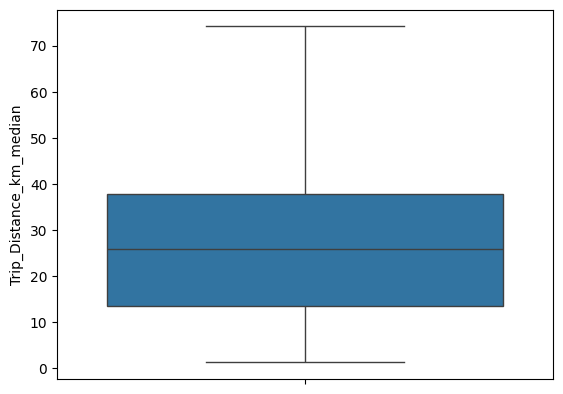

In [87]:
sns.boxplot(df1['Trip_Distance_km_median'])

In [88]:
# filling outliers in Trip_Price_median
q1=df1.Trip_Price_median.quantile(0.25)
q3=df1.Trip_Price_median.quantile(0.75)
IQR=q3-q1
min=q1-1.5*(IQR)
max=q3+1.5*(IQR)
df1['Trip_Price_median']=[min if x<min else max if x>max else x for x in df1['Trip_Price_median']]

<Axes: ylabel='Trip_Price_median'>

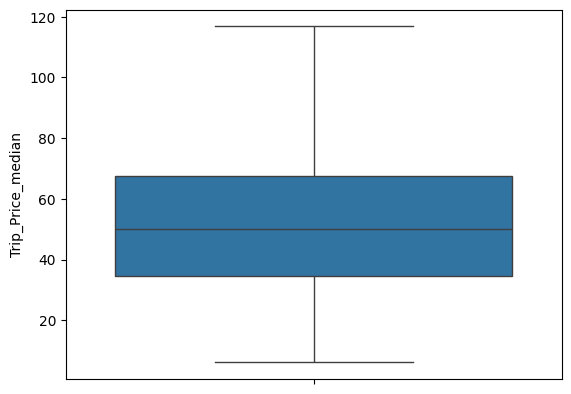

In [89]:
sns.boxplot(df1['Trip_Price_median'])

###  Data Preprocessing

Dataset Overview:

  The dataset contains numerical and categorical features

  Categorical Variables Encoded using One-Hot Encoding / Ordinal Encoding

  Numerical Features Scaled using StandardScaler

  In OneHotencoding the ranking gets by alphabetical order in this we get afternoon,evening,morning,night

In [90]:
df1['Time_of_Day_mode'].value_counts().reset_index()#onehot

,Time_of_Day_mode,count
0,Afternoon,429
1,Morning,280
2,Evening,198
3,Night,93


In [91]:
df1['Day_of_Week_mode'].value_counts().reset_index()#onehot

,Day_of_Week_mode,count
0,Weekday,717
1,Weekend,283


In [92]:
df1['Traffic_Conditions_mode'].value_counts().reset_index()#ordinal

,Traffic_Conditions_mode,count
0,Low,464
1,Medium,361
2,High,175


In [93]:
df1['Weather_mode'].value_counts().reset_index()#onehot

,Weather_mode,count
0,Clear,726
1,Rain,221
2,Snow,53


In [94]:
# importing One hot encoder
from sklearn.preprocessing import OneHotEncoder
#creating instance of One hot encoder
encoder=OneHotEncoder()
#perform fit and transform
encoded=encoder.fit_transform(df1[['Time_of_Day_mode']]).toarray()

In [95]:
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [96]:
df1 = pd.concat([df1, encoder_df], axis=1)

In [97]:
#creating instance of One hot encoder
encoder=OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Change sparse_output to False
#perform fit and transform
encoded=encoder.fit_transform(df1[['Weather_mode']])
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
df1 = pd.concat([df1, encoder_df], axis=1)

In [140]:
#creating instance of One hot encoder
encoder=OneHotEncoder(sparse_output=False, handle_unknown='ignore') # handle_unknown='ignore' to avoid the error
encoded=encoder.fit_transform(df[['Day_of_Week_mode']])
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())


In [141]:
#df1=df1.drop(columns=['Day_of_Week_mode']).reset_index(drop=True)
df1 = pd.concat([df1, encoder_df], axis=1)

In [100]:
df1.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price',
       'Trip_Distance_km_median', 'Time_of_Day_mode', 'Day_of_Week_mode',
       'Passenger_Count_median', 'Traffic_Conditions_mode', 'Weather_mode',
       'Base_Fare_median', 'Per_Km_Rate_median', 'Per_Minute_Rate_median',
       'Trip_Duration_Minutes_median', 'Trip_Price_median',
       'Time_of_Day_mode_Afternoon', 'Time_of_Day_mode_Evening',
       'Time_of_Day_mode_Morning', 'Time_of_Day_mode_Night',
       'Weather_mode_Clear', 'Weather_mode_Rain', 'Weather_mode_Snow',
       'Day_of_Week_mode_Weekday', 'Day_of_Week_mode_Weekend',
       'Day_of_Week_mode_Weekday', 'Day_of_Week_mode_Weekend'],
      dtype='object')

In [109]:
df1=df1.drop(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],axis=1)

In [136]:
#Traffic_Conditions_mode filling with ordinal data
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder(categories=[['Low','Medium','High']])


In [137]:
encoder__df = pd.DataFrame(encoder.fit_transform(df[['Traffic_Conditions_mode']]), columns=['Traffic_Conditions_mode'], index=df.index)

In [138]:
df1 = pd.concat([df1, encoder__df], axis=1)

In [146]:
df1=df1.drop(['Day_of_Week_mode_Weekday', 'Day_of_Week_mode_Weekend',
       'Traffic_Conditions_mode','Weather_mode'],axis=1)

In [147]:
df1

,Trip_Distance_km_median,Passenger_Count_median,Base_Fare_median,Per_Km_Rate_median,Per_Minute_Rate_median,Trip_Duration_Minutes_median,Trip_Price_median,Time_of_Day_mode_Afternoon,Time_of_Day_mode_Evening,Time_of_Day_mode_Morning,Time_of_Day_mode_Night,Weather_mode_Clear,Weather_mode_Rain,Weather_mode_Snow
0,19.35,3.0,3.56,0.80,0.32,53.82,36.2624,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,47.59,1.0,3.52,0.62,0.43,40.57,50.0745,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,36.87,1.0,2.70,1.21,0.15,37.27,52.9032,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,30.33,4.0,3.48,0.51,0.15,116.81,36.4698,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,25.92,3.0,2.93,0.63,0.32,22.64,15.6180,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,4.0,2.39,0.62,0.49,58.39,34.4049,1.0,0.0,0.0,0.0,1.0,0.0,0.0
996,45.95,4.0,3.12,0.61,0.29,61.96,62.1295,0.0,0.0,0.0,1.0,1.0,0.0,0.0
997,7.70,3.0,2.08,1.78,0.29,54.18,33.1236,0.0,0.0,1.0,0.0,0.0,1.0,0.0
998,47.56,1.0,2.67,0.82,0.17,114.94,61.2090,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [148]:
df2=df1.copy()

In [149]:
df2

,Trip_Distance_km_median,Passenger_Count_median,Base_Fare_median,Per_Km_Rate_median,Per_Minute_Rate_median,Trip_Duration_Minutes_median,Trip_Price_median,Time_of_Day_mode_Afternoon,Time_of_Day_mode_Evening,Time_of_Day_mode_Morning,Time_of_Day_mode_Night,Weather_mode_Clear,Weather_mode_Rain,Weather_mode_Snow
0,19.35,3.0,3.56,0.80,0.32,53.82,36.2624,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,47.59,1.0,3.52,0.62,0.43,40.57,50.0745,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,36.87,1.0,2.70,1.21,0.15,37.27,52.9032,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,30.33,4.0,3.48,0.51,0.15,116.81,36.4698,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,25.92,3.0,2.93,0.63,0.32,22.64,15.6180,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,4.0,2.39,0.62,0.49,58.39,34.4049,1.0,0.0,0.0,0.0,1.0,0.0,0.0
996,45.95,4.0,3.12,0.61,0.29,61.96,62.1295,0.0,0.0,0.0,1.0,1.0,0.0,0.0
997,7.70,3.0,2.08,1.78,0.29,54.18,33.1236,0.0,0.0,1.0,0.0,0.0,1.0,0.0
998,47.56,1.0,2.67,0.82,0.17,114.94,61.2090,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Data Scaling ---Data Preprocessing (Part-2)
  Train Test Split
  Its a manadatory step to perform train and test data split before scaling in the process of data preprocessing for better accuracy

In [150]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df2.drop('Trip_Price_median',axis=1),df2['Trip_Price_median'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape


((700, 13), (300, 13))

In [151]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [152]:
scaler.mean_

array([2.59358679e+01, 2.39714286e+00, 3.53172857e+00, 1.23342857e+00,
       2.93628571e-01, 6.36586857e+01, 4.10000000e-01, 1.95714286e-01,
       2.90000000e-01, 1.04285714e-01, 7.22857143e-01, 2.30000000e-01,
       4.71428571e-02])

In [153]:
X_train

,Trip_Distance_km_median,Passenger_Count_median,Base_Fare_median,Per_Km_Rate_median,Per_Minute_Rate_median,Trip_Duration_Minutes_median,Time_of_Day_mode_Afternoon,Time_of_Day_mode_Evening,Time_of_Day_mode_Morning,Time_of_Day_mode_Night,Weather_mode_Clear,Weather_mode_Rain,Weather_mode_Snow
105,13.2200,2.0,3.79,0.68,0.37,51.92,0.0,0.0,1.0,0.0,0.0,1.0,0.0
68,4.6500,1.0,4.51,1.08,0.43,56.54,1.0,0.0,0.0,0.0,1.0,0.0,0.0
479,26.6300,1.0,3.73,0.56,0.38,43.27,1.0,0.0,0.0,0.0,1.0,0.0,0.0
399,37.9700,2.0,3.60,1.13,0.45,113.49,0.0,1.0,0.0,0.0,0.0,1.0,0.0
434,5.1200,4.0,3.17,1.92,0.21,75.09,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,74.1625,1.0,4.23,0.85,0.28,29.30,1.0,0.0,0.0,0.0,1.0,0.0,0.0
192,45.1200,4.0,3.52,1.52,0.20,35.34,1.0,0.0,0.0,0.0,1.0,0.0,0.0
629,13.3700,2.0,2.85,1.92,0.19,114.32,1.0,0.0,0.0,0.0,0.0,1.0,0.0
559,31.4000,3.0,4.50,1.87,0.32,28.13,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [154]:
X_train_scaled

array([[-0.81868963, -0.37346031,  0.31195257, ..., -1.61500694,
         1.82970656, -0.22243035],
       [-1.37045457, -1.31382799,  1.18160295, ...,  0.61919238,
        -0.54653573, -0.22243035],
       [ 0.04469052, -1.31382799,  0.2394817 , ...,  0.61919238,
        -0.54653573, -0.22243035],
       ...,
       [-0.80903213, -0.37346031, -0.82342432, ..., -1.61500694,
         1.82970656, -0.22243035],
       [ 0.3517989 ,  0.56690737,  1.16952447, ...,  0.61919238,
        -0.54653573, -0.22243035],
       [ 1.32656217, -0.37346031, -1.76554557, ..., -1.61500694,
         1.82970656, -0.22243035]])

In [155]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [156]:
np.round(X_train.describe(),1)

,Trip_Distance_km_median,Passenger_Count_median,Base_Fare_median,Per_Km_Rate_median,Per_Minute_Rate_median,Trip_Duration_Minutes_median,Time_of_Day_mode_Afternoon,Time_of_Day_mode_Evening,Time_of_Day_mode_Morning,Time_of_Day_mode_Night,Weather_mode_Clear,Weather_mode_Rain,Weather_mode_Snow
count,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0
mean,25.9,2.4,3.5,1.2,0.3,63.7,0.4,0.2,0.3,0.1,0.7,0.2,0.0
std,15.5,1.1,0.8,0.4,0.1,31.0,0.5,0.4,0.5,0.3,0.4,0.4,0.2
min,1.2,1.0,2.0,0.5,0.1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,13.0,2.0,2.8,0.9,0.2,39.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,25.9,2.0,3.5,1.2,0.3,61.9,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,37.6,3.0,4.2,1.6,0.4,89.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0
max,74.2,4.0,5.0,2.0,0.5,119.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Analysis of Effects of Scaling before and after

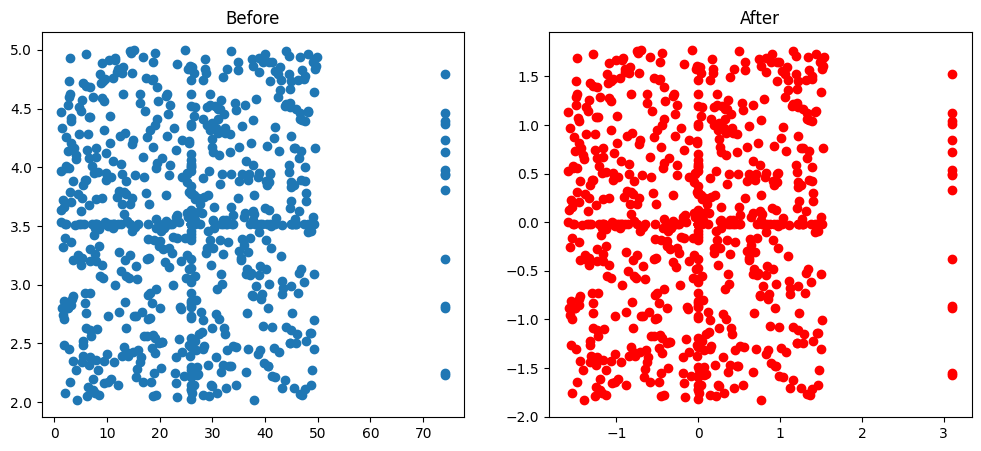

In [157]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Trip_Distance_km_median'],X_train['Base_Fare_median'])
ax1.set_title("Before")
ax2.scatter(X_train_scaled['Trip_Distance_km_median'],X_train_scaled['Base_Fare_median'],color='red')
ax2.set_title("After")
plt.show()


<Axes: title={'center': 'After scaling'}, xlabel='Base_Fare_median', ylabel='Density'>

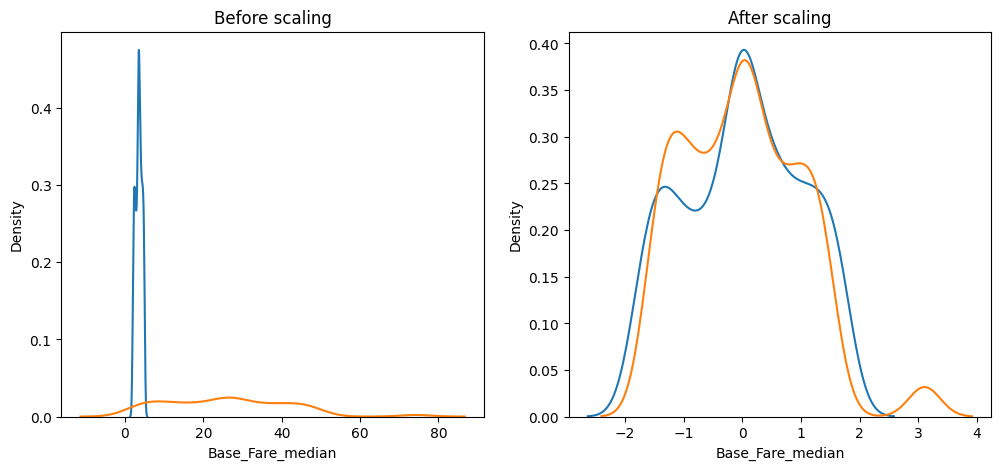

In [158]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title('Before scaling')
sns.kdeplot(X_train['Base_Fare_median'],ax=ax1)
sns.kdeplot(X_train['Trip_Distance_km_median'],ax=ax1)
#after scaling
ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled['Base_Fare_median'],ax=ax2)
sns.kdeplot(X_train_scaled['Trip_Distance_km_median'],ax=ax2)

### Model Development

  The Linear Regression model was trained using the preprocessed dataset.

In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


In [170]:
# Define target variable (Trip Price)
y = df1['Trip_Price_median']

In [171]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [174]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 7.71690919361246
Mean Squared Error (MSE): 115.85059400647306
R-squared (R²): 0.8147622059229794


## Model Analysis / Analysis

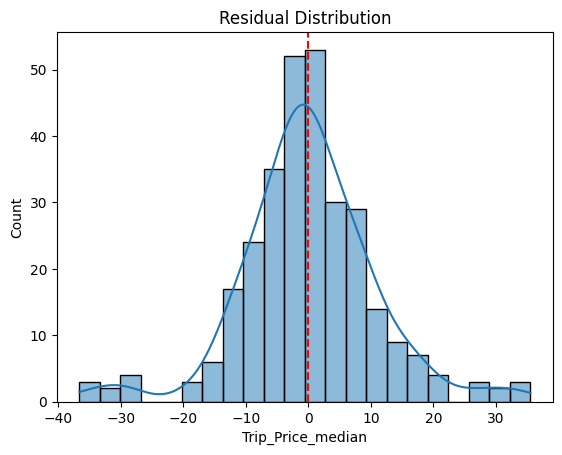

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residual distribution
sns.histplot(residuals, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.title("Residual Distribution")
plt.show()

#Bell-shaped curve → Good

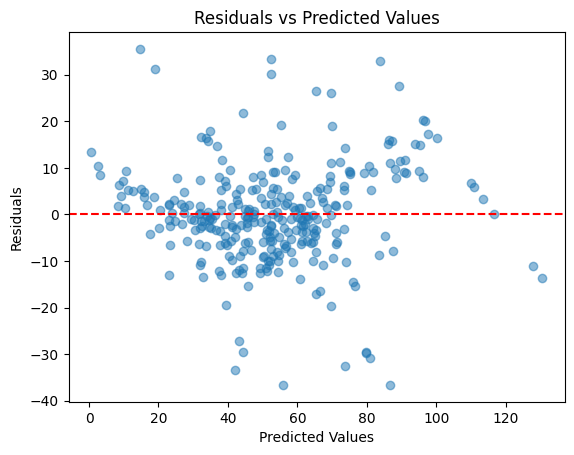

In [168]:
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


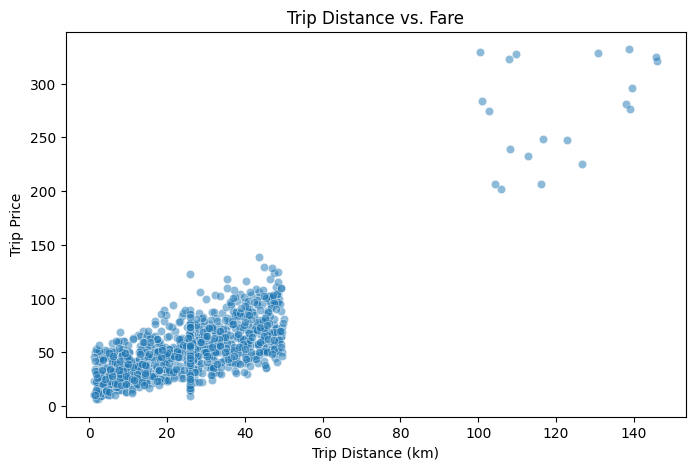

In [180]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Trip_Distance_km_median'], y=df['Trip_Price_median'], alpha=0.5)
plt.xlabel("Trip Distance (km)")
plt.ylabel("Trip Price")
plt.title("Trip Distance vs. Fare")
plt.show()

### Model Evaluation

Performance Metrics:
Metric	Value
Mean Squared Error (MSE)	116.37
Mean Absolute Error (MAE)	7.72
R-squared (R²)	0.814

Interpretation:

  MSE (116.37): Measures squared errors, penalizing larger mistakes more.

  MAE (7.72): On average, the model’s predictions deviate by ₹7.72 from actual prices.

  R² (0.814): The model explains 81.4% of the variance in trip prices.